<a href="https://colab.research.google.com/github/Alejandro3009/ADA-Informes/blob/main/Orden_Topologico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Orden Topologico**

#1. Descripcion del problema

##Problema de optimizacion

Los problemas de optimizacion se basan en la idea de encontrar la manera optima de poder realizar cierta accion, esto ya sea realizando un analisis a fondo de las opciones que tenemos y sus consecuencias, como decidirnos por la mejor opcion del momento y no preocuparnos del futuro.

##Orden Topologico

El problema del orden topologico es un problema de ordenamiento, el cual se define de la siguiente forma. Si se nos entrega un grafo dirigido **sin ciclos** y se nos pregunta como se puede llegar de un nodo a otro, **cual seria el orden** de todos los nodos? de todos los caminos que puedo recorrer.

* **Entrada:** un grafo dirigido sin ciclos.
* **Salida:** el mismo grafo marcado con uno de los posibles ordenes topologicos, donde la raiz estaria marcada con el numero 1 y la hoja mas profunda con la longitud del grafo.

#2. Descripcion del algoritmo

Para resolver este problema el algoritmo utiliza la **busqueda en profundidad** (DFS), DFS siendo un acronimo en ingles queriendo decir **Depth-first search**.

En este proceso se basa
1. en buscar los nodos que no tengan ningun arco de entrada, a estos nodos se les llama nodo raiz.
2. estos nodos se marcan como visitados y son puestos en un stack.
3. se revisan los nodos a los cuales los arcos se dirigen.
4. este proceso se repite hasta, quedarnos sin nodos que revisar o hasta encontrar un nodo marcado como visitado.
* si se encuentra un nodo visitado se sabe que existe un ciclo, por lo tanto se termina el proceso.
* si se termina el grafo, se van sacando los nodos del stack y numerandolos segun la longitud del grafo - 1. 

##2.1. Algoritmo recursivo

Este problema tiene dos maneras de ser resuelto, la primera con un algoritmo **recursivo**, el cual sigue los pasos anteriormente descritos.

resultado en forma de lista:  [12, 6, 2, 10, 7, 11, 4, 8, 3, 5, 9, 0]


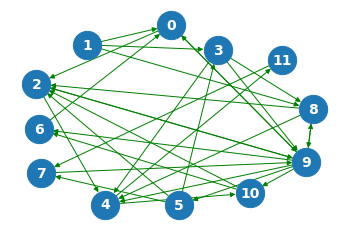

In [118]:
def topologicoRecusivo(T,n,state,S,Verbose = False):
  if state[n] == "visitado": # caso base
    if Verbose:
      print("El nodo ",n," ya a sido visitado por lo tanto la busqueda de esta rama termina \n")
    return state,S

  for adj in reversed(list(T[n])):
    if state[adj] == "no descubierto": 
      if Verbose:
        print("El nodo ",adj," no habia sido encontrado con anterioridad asi que ahora se marca como descubierto y seguimos viendo su rama \n")
      state[n] = "descubierto"
      state,S = topologicoRecusivo(T,adj,state,S)
  
  if Verbose:
    print("ahora que se revisaron todas las ramas del nodo ",n," podemos decir que lo hemos visitado \n")
  state[n] = "visitado"
  S.append(n)
  return state,S

T = graph_instance_creator(12)
state = dict()
for n in T: state[n] = "no descubierto"
S = [len(T)]
state,S = topologicoRecusivo(T,0,state,S)
print("resultado en forma de lista: ",S)

grafo = graph_to_nxdigraph(T)
pos = nx.spring_layout(grafo,20)

labels = nx.get_edge_attributes(grafo,'weight')
nx.draw_networkx_edge_labels(grafo,pos,edge_labels=labels,font_size=14)

nx.draw(grafo,pos,with_labels=True,node_size=800,font_color="white",font_size=14,font_weight="black",width=1.0,edge_color="green")

##2.2. Solucion iterativa

Y tambien se puede resolver el problema con un algoritmo **iterativo**, y al igual que el **recursivo**, este algoritmo sigue los mismos pasos

[5, 11, 1, 2, 4, 7, 3, 0, 10, 8, 9]


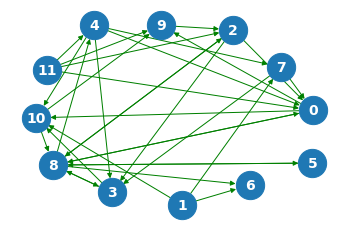

In [114]:
def topologicoIterativo(T):
  state = dict()
  for n in T: state[n] = "no descubierto"

  lAux = []

  for n in T:
    S = [n]
    while len(S)>0:
      n=S.pop()
      if state[n]=="no descubierto":
        state[n] = "descubierto"
        S.append(n)
        for adj in T:
          if state[n] == "no descubierto": S.append(adj)

      elif state[n] == "descubierto" and state[n] != "visitado":
        state[n] = "visitado"
        lAux.append(n)

  return lAux

T = graph_instance_creator(12)
L = topologicoIterativo(T)
print(L)

grafo = graph_to_nxdigraph(T)
pos = nx.spring_layout(grafo,5)

labels = nx.get_edge_attributes(grafo,'weight')
nx.draw_networkx_edge_labels(grafo,pos,edge_labels=labels,font_size=14)

nx.draw(grafo,pos,with_labels=True,node_size=800,font_color="white",font_size=14,font_weight="black",width=1.0,edge_color="green")

##2.3. Ejecucion del verbose

A continuación, hay otra ejecución del código **recursivo** esta vez mostrando el paso a paso de este, esta opción se habilita cuando $verbose = True$.

El nodo  2  no habia sido encontrado con anterioridad asi que ahora se marca como descubierto y seguimos viendo su rama 

ahora que se revisaron todas las ramas del nodo  0  podemos decir que lo hemos visitado 

resultado en forma de lista:  [12, 11, 10, 4, 3, 7, 8, 6, 9, 5, 2, 0]


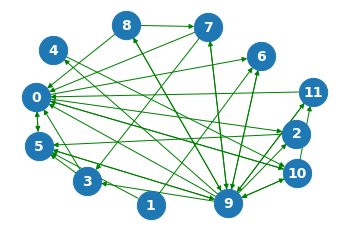

In [103]:
T = graph_instance_creator(12)
state = dict()
for n in T: state[n] = "no descubierto"
S = [len(T)]
state,S = topologicoRecusivo(T,0,state,S,True)
print("resultado en forma de lista: ",S)

grafo = graph_to_nxdigraph(T)
pos = nx.spring_layout(grafo,20)

labels = nx.get_edge_attributes(grafo,'weight')
nx.draw_networkx_edge_labels(grafo,pos,edge_labels=labels,font_size=14)

nx.draw(grafo,pos,with_labels=True,node_size=800,font_color="white",font_size=14,font_weight="black",width=1.0,edge_color="green")

#3. Tiempo de ejecución

El algoritmo tiene un tiempo de ejecución de $O(V+E)$ donde V representa la cantidad de nodos (o vertices) y E representa a los arcos entre ellos.

Prueba del Teorema

Esto se puede comprobar de la siguiente manera:
1.  El algoritmo ingresa únicamente una vez a cada vertice al stack, lo cuál nos da una complejida de $O(V)$

2.  Por cada vertice, el algoritmo recorre una única vez sus conexiones, lo que finalmente nos da que su complejidad es de $O(E)$

Si juntamos estas complejidades nos da que la complejidad total (o tiempo de ejecución) del algoritmo es de $O(V+E)$


#4. Correctitud

La correctitud de este algoritmo puede ser explicada de forma similar a la del DFS, puesto que su implementación son similares.

El algoritmo llamará a cada vértice una única vez, puesto que al momento de llamar a este se le colocará una etiqueta para indicar que ya fue analizado. Provocando que cada vértice tenga una etiqueta distinta que va desde 1 hasta n, siendo n la cantidad de vértices totales.

###Prueba del teorema:

Caso base (n = 1): si el grafo recibido tiene únicamente un nodo, el orden topológico será iguál a 1.

Caso 1: si V se descubre antes que W, se tiene que V se llama como nodo inicial antes de que W se marque como explorado. Como W es alcanzable desde V y se llama recursivamente en W, debido al funcionamiento LIFO de las llamadas recursivas, la llamada en W se completa antes que la de V, por lo que según la etiqueta f(w) > f(v).

Caso 2: supongamos que W es descubierto antes que V, como G es un grafo DAG no hay camino de W a v, por otro lado, combinar este camino con el arco (V,W) produciría un ciclo directo. Por lo que esta termina con V como inexplorado, nuevamente esto produce que la llamada en W se complete antes, y que se mantenga que f(W) > f(V).


#5. Experimentos

A continuacion se realizara una serie de experimentos para comparar el rendimiento de la implementacion **dinaminca bottom up** y la implementacion **recursiva**.

##5.1. tiempo de ejecucion

En este experimento se comparar el tiempo de ejecucion de la implentacion **bottom up** y la **recursiva**, para esto el algortimo va a crear una lista de precios aleatoria y va ejecutar ambas implementaciones $10$ veces, de entre las cuales va a elegir la mejor y graficarla.

* tiempo de ejecucion de **recursiva** (la gráfica azul)
* Tiempo de ejecucion de **iterativa** (la gráfica naranja)

para un problema que tiene un tamaño $n \in [20,50]$

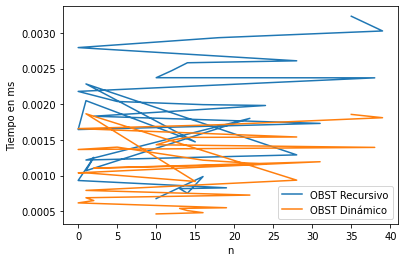

In [117]:
import matplotlib.pyplot as plt
import random
from timeit import repeat

x = []
y1 = []
y2 = []

for n in range(20,50):
  T = graph_instance_creator(n)
  state = dict()
  for n in T: state[n] = "no descubierto"
  S = [len(T)]

  t1 = repeat(setup="from __main__ import topologicoRecusivo", stmt=f"topologicoRecusivo({list(T)},{0},{state},{S})", repeat = 1, number = 10)
  t2 = repeat(setup="from __main__ import topologicoIterativo", stmt=f"topologicoIterativo({list(T})", repeat = 1, number = 10)

  x.append(n)
  y1.append(t1)
  y2.append(t2)

plt.plot(x,y1)
plt.plot(x,y2)

plt.legend(["OBST Recursivo", "OBST Dinámico"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

###Analisis

como se puede apreciar, esta grafica es erratica y sin sentido, y esto puede deberse aun error en la implementacion del algoritmo en el codigo (y de esto estoy al tanto, ya que. Creo que la manera que meto los datos al stack y los casos base que utilizo pueden ser el problema).

#6. Anexos

##6.1. Codigo para generar grafos

Este codigo es el que crea los grafos necesarios para hacer los experimentos.

In [3]:
from collections import defaultdict
import math
import random

# Crea un grafo sin ciclos de nodos de 0 a V - 1
# Retorna un dicionario [defaultdict(list)] 
# de key valor del nodo (0 a V - 1) y de value una 
# lista con los nodos a los cuales se conecta
def graph_instance_creator(V):
  nodes = random.sample(range(0, V), V)
  div = int(math.ceil(V / 4))

  current_div = div
  graph = defaultdict(list)
  for i in reversed(range(len(nodes))):
    selectables = []
    if (len(nodes) - current_div <= 0):
      selectables = random.sample(nodes, random.randint(1, len(nodes)))
    else:
      population = nodes[:len(nodes)-current_div]
      end = len(population) if len(population) < 4 else 4
      selectables = random.sample(population, random.randint(1, end))
    for selectable in selectables:
      if (nodes[i] != selectable and not selectable in graph[nodes[i]]):
        graph[nodes[i]].append(selectable)
    if (i < len(nodes) - current_div):
      current_div += div

  return graph

##6.2. Codigo para generar una visualizacion grafica del grafo

Este codigo es el que permite crear las representaciones graficas de los grafos, tal representaciones fueron usadas a lo largo del informe.

In [27]:
from collections import defaultdict
import networkx as nx

# Recibe un grafo de tipo [defaultdict(list)]
# Retorna un nx.DiGraph de la libreria networkx
def graph_to_nxdigraph(graph):
  nxdigraph = nx.DiGraph()
  for i in graph.keys():
    nxdigraph.add_node(i)
    for v in graph[i]:
      nxdigraph.add_edge(i, v)
  return nxdigraph